In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns

%run ../funtion/Funciones.ipynb

# Exercicio 6
# PSD & DFA:

## Noise 80 series
10 de 64 

10 de 128

10 de 256 

10 de 512

10 de 1024

10 de 2048

10 de 4096

10 de 8192

In [2]:
nn = np.arange(6,14)
expo = np.zeros([len(nn)])

for i in range(len(nn)):
    expo[i] = 2**nn[i]

In [4]:
noise64 = np.zeros([int(expo[0]),10])
noise128 = np.zeros([int(expo[1]),10])
noise256 = np.zeros([int(expo[2]),10])
noise512 = np.zeros([int(expo[3]),10])
noise1024 = np.zeros([int(expo[4]),10])
noise2048 = np.zeros([int(expo[5]),10])
noise4096 = np.zeros([int(expo[6]),10])
noise8192 = np.zeros([int(expo[7]),10])

In [5]:
for t in range(10):
    a = grng1(64)
    b = grng1(128)
    c = grng1(256)
    d = grng1(512)
    e = grng1(1024)
    f = grng1(2048)
    g = grng1(4096)
    h = grng1(8192)
    
    noise64[:,t] = a[:,0]
    noise128[:,t] = b[:,0] 
    noise256[:,t] = c[:,0] 
    noise512[:,t] = d[:,0] 
    noise1024[:,t] = e[:,0] 
    noise2048[:,t] = f[:,0] 
    noise4096[:,t] = g[:,0] 
    noise8192[:,t] = h[:,0] 

In [6]:
noise64_norm,noise64_esta = Normalizar1(noise64)
noise128_norm,noise128_esta = Normalizar1(noise128)
noise256_norm,noise256_esta = Normalizar1(noise256)
noise512_norm,noise512_esta = Normalizar1(noise512)
noise1024_norm,noise1024_esta = Normalizar1(noise1024)
noise2048_norm,noise2048_esta = Normalizar1(noise2048)
noise4096_norm,noise4096_esta = Normalizar1(noise4096)
noise8192_norm,noise8192_esta = Normalizar1(noise8192)

Text(0.5, 0, 'Tempo (t)')

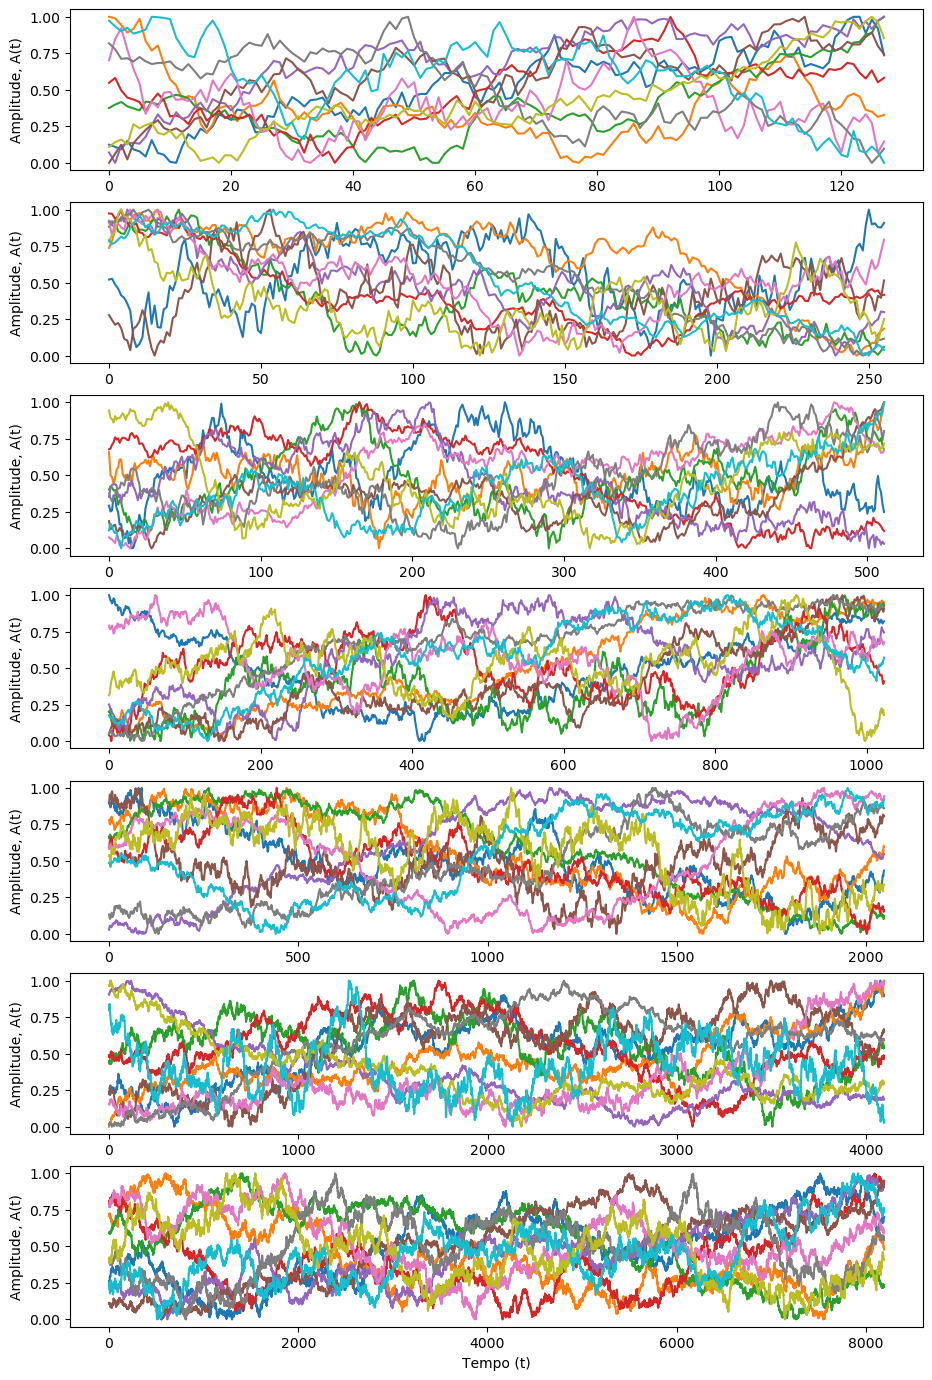

In [7]:
fig1 = plt.figure(figsize=(11,20),dpi=100)

plt.subplot(3, 1, 1)
plt.plot(noise64_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 2)
plt.plot(noise128_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 3)
plt.plot(noise256_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 4)
plt.plot(noise512_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 5)
plt.plot(noise1024_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 6)
plt.plot(noise2048_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 7)
plt.plot(noise4096_norm)
plt.ylabel("Amplitude, A(t)")

plt.subplot(8, 1, 8)
plt.plot(noise8192_norm)
plt.ylabel("Amplitude, A(t)")
plt.xlabel("Tempo (t)")

## ColorNoise 60 series
20 white noise

20 pink noise

20 red noise

In [8]:
white_noise = np.zeros([8192,20])
pink_noise = np.zeros([8192,20])
red_noise = np.zeros([8192,20])

for t in range(20):
    white_noise[:,t] = powerlaw_psd_gaussian(0,8192)
    pink_noise[:,t] = powerlaw_psd_gaussian(1,8192)
    red_noise[:,t] = powerlaw_psd_gaussian(2,8192)

In [9]:
white_norm,white_esta = Normalizar1(white_noise)
pink_norm,pink_esta = Normalizar1(pink_noise)
red_norm,red_esta = Normalizar1(red_noise)

In [10]:
white_esta = white_esta.drop(['Group','Cor'],axis=1)
white_esta['Group'] = 'white'

pink_esta = pink_esta.drop(['Group','Cor'],axis=1)
pink_esta['Group'] = 'pink'

red_esta = red_esta.drop(['Group','Cor'],axis=1)
red_esta['Group'] = 'red'

Text(0.5, 1.0, 'Red Noise')

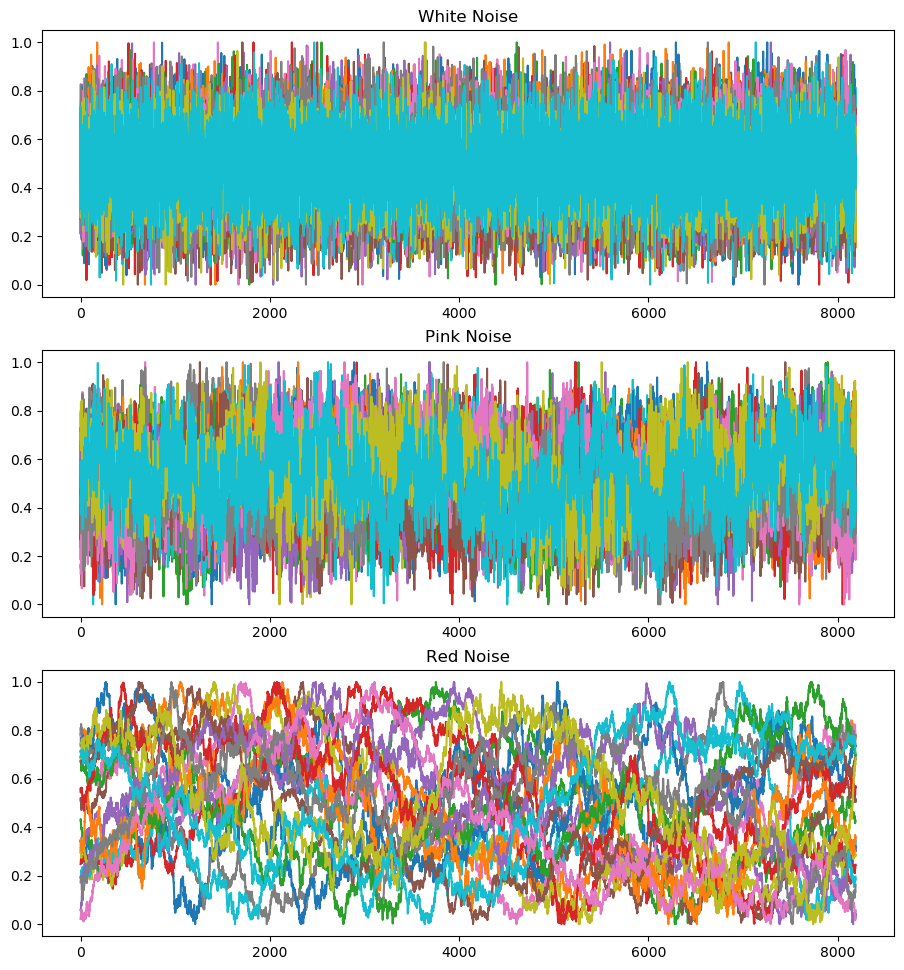

In [11]:
fig2 = plt.figure(figsize=(11,12),dpi=100)

plt.subplot(3, 1, 1)
plt.plot(white_norm)
plt.title('White Noise')

plt.subplot(3, 1, 2)
plt.plot(pink_norm)
plt.title('Pink Noise')

plt.subplot(3, 1, 3)
plt.plot(red_norm)
plt.title('Red Noise')

## PmNoise 60 series
30 Endogenas

30 Exogenas

In [12]:
endogeno1 = np.zeros([8192,10])
endogeno2 = np.zeros([8192,10])
endogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.32, 0.4)
    x2,y2 = pmodel (8192, 0.37, 0.4)
    x3,y3 = pmodel (8192, 0.42, 0.4)
    
    endogeno1[:,t] = y1[:]
    endogeno2[:,t] = y2[:]
    endogeno3[:,t] = y3[:]

In [13]:
exogeno1 = np.zeros([8192,10])
exogeno2 = np.zeros([8192,10])
exogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.18, 0.7)
    x2,y2 = pmodel (8192, 0.23, 0.7)
    x3,y3 = pmodel (8192, 0.28, 0.7)
    
    exogeno1[:,t] = y1[:]
    exogeno2[:,t] = y2[:]
    exogeno3[:,t] = y3[:]

In [14]:
endogeno1_norm,endogeno1_esta = Normalizar1(endogeno1)
endogeno2_norm,endogeno2_esta = Normalizar1(endogeno2)
endogeno3_norm,endogeno3_esta = Normalizar1(endogeno3)

exogeno1_norm,exogeno1_esta = Normalizar1(exogeno1)
exogeno2_norm,exogeno2_esta = Normalizar1(exogeno2)
exogeno3_norm,exogeno3_esta = Normalizar1(exogeno3)

In [15]:
endogeno1_esta = endogeno1_esta.drop(['Group','Cor'],axis=1)
endogeno1_esta['Group'] = 'Endogeno'

endogeno2_esta = endogeno2_esta.drop(['Group','Cor'],axis=1)
endogeno2_esta['Group'] = 'Endogeno'

endogeno3_esta = endogeno3_esta.drop(['Group','Cor'],axis=1)
endogeno3_esta['Group'] = 'Endogeno'

exogeno1_esta = exogeno1_esta.drop(['Group','Cor'],axis=1)
exogeno1_esta['Group'] = 'exogeno'

exogeno2_esta = exogeno2_esta.drop(['Group','Cor'],axis=1)
exogeno2_esta['Group'] = 'exogeno'

exogeno3_esta = exogeno3_esta.drop(['Group','Cor'],axis=1)
exogeno3_esta['Group'] = 'exogeno'

Text(0.5, 1.0, 'Exogeno Normalizado p = 0.28 e betha = 0.7')

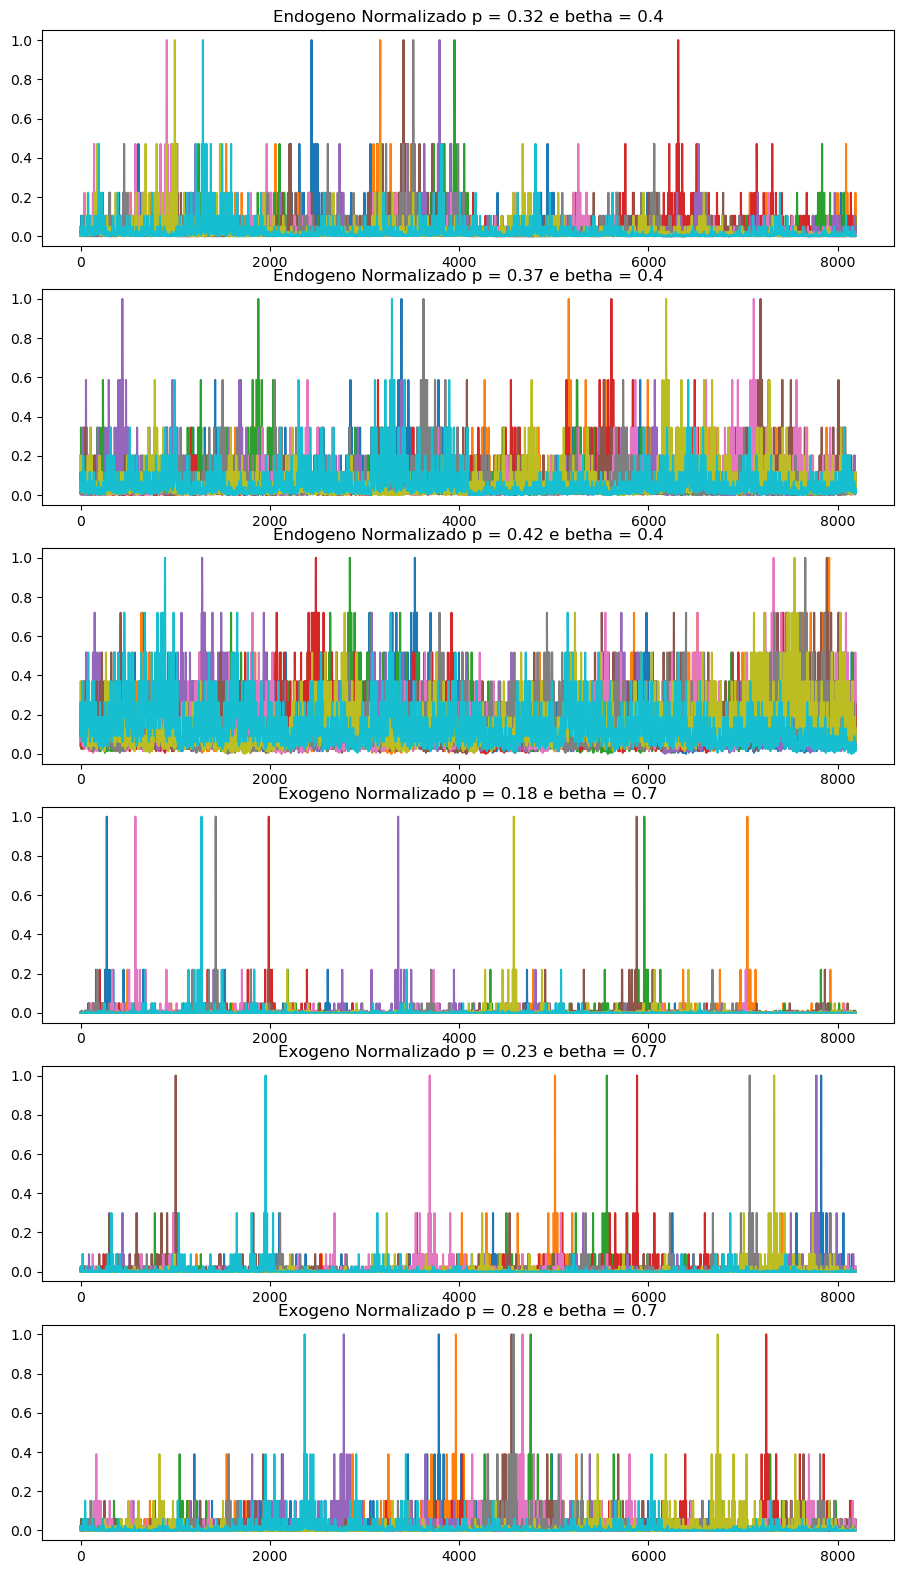

In [16]:
fig3 = plt.figure(figsize=(11,20),dpi=100)

plt.subplot(6, 1, 1)
plt.plot(endogeno1_norm)
plt.title('Endogeno Normalizado p = 0.32 e betha = 0.4')

plt.subplot(6, 1, 2)
plt.plot(endogeno2_norm)
plt.title('Endogeno Normalizado p = 0.37 e betha = 0.4')

plt.subplot(6, 1, 3)
plt.plot(endogeno3_norm)
plt.title('Endogeno Normalizado p = 0.42 e betha = 0.4')

plt.subplot(6, 1, 4)
plt.plot(exogeno1_norm)
plt.title('Exogeno Normalizado p = 0.18 e betha = 0.7')

plt.subplot(6, 1, 5)
plt.plot(exogeno2_norm)
plt.title('Exogeno Normalizado p = 0.23 e betha = 0.7')

plt.subplot(6, 1, 6)
plt.plot(exogeno3_norm)
plt.title('Exogeno Normalizado p = 0.28 e betha = 0.7')

## ChaosNoise 60 series
30 logisitca

30 henon

In [17]:
rho = np.linspace(3.81,4.0,30)
tau = 1.1
N = 511

logistica = np.zeros([N+1,30])

for t in range(30):
    
    xtemp = 0.001
    ytemp = 0.001
    
    x = [xtemp]
    y = [ytemp]
    
    for i in range(N):
        xtemp, ytemp = Logistic(rho[t],tau,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    logistica[:,t] = x

In [18]:
a = np.linspace(1.35,1.40,30)
b = np.linspace(0.21,0.30,30)

N = 511

henon = np.zeros([N+1,30])

for t in range(30):

    xtemp = 0.1
    ytemp = 0.3

    x = [xtemp]
    y = [ytemp]

    for i in range(N):
        xtemp, ytemp = HenonMap(a[t],b[t],xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    henon[:,t] = y

In [19]:
logistica_norm,logistica_esta = Normalizar1(logistica)
henon_norm,henon_esta = Normalizar1(henon)

In [20]:
logistica_esta = logistica_esta.drop(['Group','Cor'],axis=1)
logistica_esta['Group'] = 'Logistica'

henon_esta = henon_esta.drop(['Group','Cor'],axis=1)
henon_esta['Group'] = 'Henon'

Text(0.5, 1.0, 'Familas Henon')

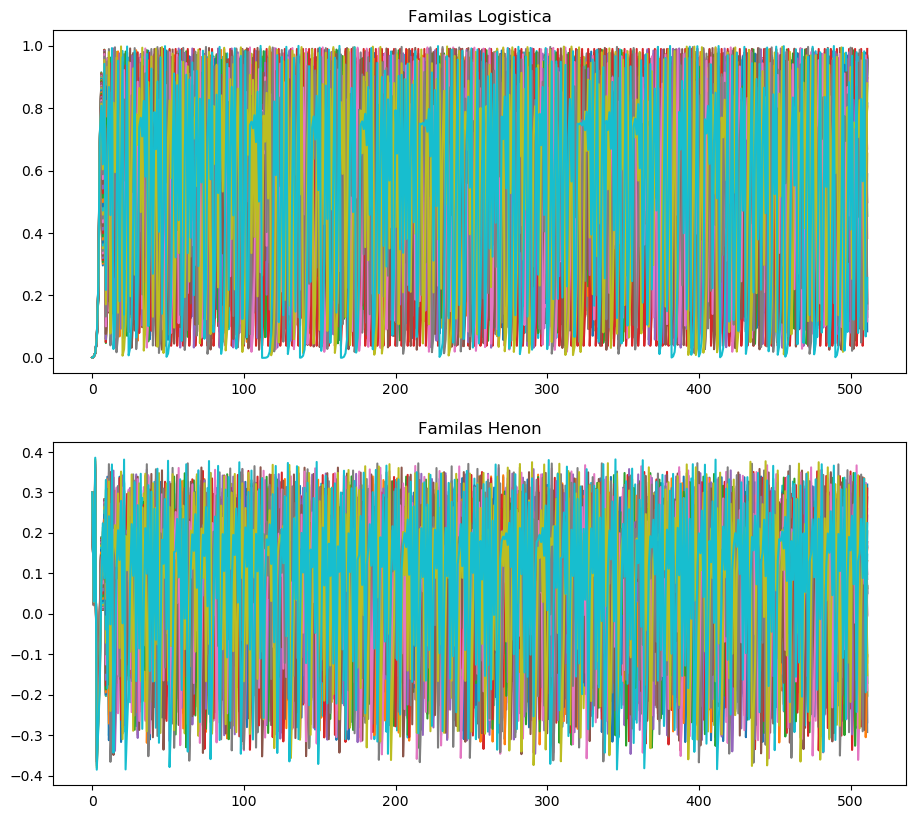

In [21]:
fig4 = plt.figure(figsize=(11,10),dpi=100)

plt.subplot(2, 1, 1)
plt.plot(logistica)
plt.title('Familas Logistica')

plt.subplot(2, 1, 2)
plt.plot(henon)
plt.title('Familas Henon')

# Betha e Alpha 

## Noise

In [22]:
betha_alpha_noise = np.zeros([80,2])

for t in range(10):   
    
    freqs, power, xdata, ydata, amp, betha64, powerlaw, INICIO, FIM = psd(noise64_norm[:,t])
    freqs, power, xdata, ydata, amp, betha128, powerlaw, INICIO, FIM = psd(noise128_norm[:,t])
    freqs, power, xdata, ydata, amp, betha256, powerlaw, INICIO, FIM = psd(noise256_norm[:,t])
    freqs, power, xdata, ydata, amp, betha512, powerlaw, INICIO, FIM = psd(noise512_norm[:,t])
    freqs, power, xdata, ydata, amp, betha1024, powerlaw, INICIO, FIM = psd(noise1024_norm[:,t])
    freqs, power, xdata, ydata, amp, betha2048, powerlaw, INICIO, FIM = psd(noise2048_norm[:,t])
    freqs, power, xdata, ydata, amp, betha4096, powerlaw, INICIO, FIM = psd(noise4096_norm[:,t])
    freqs, power, xdata, ydata, amp, betha8192, powerlaw, INICIO, FIM = psd(noise8192_norm[:,t])
    
    alpha64, vetoutput, x, y, reta, erro = dfa1d(noise64_norm[:,t],1)
    alpha128, vetoutput, x, y, reta, erro = dfa1d(noise128_norm[:,t],1)
    alpha256, vetoutput, x, y, reta, erro = dfa1d(noise256_norm[:,t],1)
    alpha512, vetoutput, x, y, reta, erro = dfa1d(noise512_norm[:,t],1)
    alpha1024, vetoutput, x, y, reta, erro = dfa1d(noise1024_norm[:,t],1)
    alpha2048, vetoutput, x, y, reta, erro = dfa1d(noise2048_norm[:,t],1)
    alpha4096, vetoutput, x, y, reta, erro = dfa1d(noise4096_norm[:,t],1)
    alpha8192, vetoutput, x, y, reta, erro = dfa1d(noise8192_norm[:,t],1)

    betha_alpha_noise[t,0],betha_alpha_noise[t,1] = betha64,alpha64 
    betha_alpha_noise[t+10,0],betha_alpha_noise[t+10,1] = betha128,alpha128
    betha_alpha_noise[t+20,0],betha_alpha_noise[t+20,1] = betha256,alpha256
    betha_alpha_noise[t+30,0],betha_alpha_noise[t+30,1] = betha512,alpha512
    betha_alpha_noise[t+40,0],betha_alpha_noise[t+40,1] = betha1024,alpha1024
    betha_alpha_noise[t+50,0],betha_alpha_noise[t+50,1] = betha2048,alpha2048
    betha_alpha_noise[t+60,0],betha_alpha_noise[t+60,1] = betha4096,alpha4096
    betha_alpha_noise[t+70,0],betha_alpha_noise[t+70,1] = betha8192,alpha8192

## Color Noise

In [23]:
betha_alpha_color = np.zeros([60,2])

for t in range(20):

    freqs, power, xdata, ydata, amp, betha_white, powerlaw, INICIO, FIM = psd(white_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_pink, powerlaw, INICIO, FIM = psd(pink_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_red, powerlaw, INICIO, FIM = psd(red_norm[:,t])
    
    alpha_white, vetoutput, x, y, reta, erro = dfa1d(white_norm[:,t],1)
    alpha_pink, vetoutput, x, y, reta, erro = dfa1d(pink_norm[:,t],1)
    alpha_red, vetoutput, x, y, reta, erro = dfa1d(red_norm[:,t],1)

    betha_alpha_color[t,0],betha_alpha_color[t,1] = betha_white,alpha_white
    betha_alpha_color[t+20,0],betha_alpha_color[t+20,1] = betha_pink,alpha_pink
    betha_alpha_color[t+40,0],betha_alpha_color[t+40,1] = betha_red,alpha_red

## Pm Noise

In [24]:
betha_alpha_pm = np.zeros([60,2])

for t in range(10):
    
    freqs, power, xdata, ydata, amp, betha_endogeno1, powerlaw, INICIO, FIM = psd(endogeno1_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_endogeno2, powerlaw, INICIO, FIM = psd(endogeno2_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_endogeno3, powerlaw, INICIO, FIM = psd(endogeno3_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_exogeno1, powerlaw, INICIO, FIM = psd(exogeno1_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_exogeno2, powerlaw, INICIO, FIM = psd(exogeno2_norm[:,t])
    freqs, power, xdata, ydata, amp, betha_exogeno3, powerlaw, INICIO, FIM = psd(exogeno3_norm[:,t])
    
    alpha_endogeno1, vetoutput, x, y, reta, erro = dfa1d(endogeno1_norm[:,t],1)
    alpha_endogeno2, vetoutput, x, y, reta, erro = dfa1d(endogeno2_norm[:,t],1)
    alpha_endogeno3, vetoutput, x, y, reta, erro = dfa1d(endogeno3_norm[:,t],1)
    alpha_exogeno1, vetoutput, x, y, reta, erro = dfa1d(exogeno1_norm[:,t],1)
    alpha_exogeno2, vetoutput, x, y, reta, erro = dfa1d(exogeno2_norm[:,t],1)
    alpha_exogeno3, vetoutput, x, y, reta, erro = dfa1d(exogeno3_norm[:,t],1)
    
    betha_alpha_pm[t,0],betha_alpha_pm[t,1] = betha_endogeno1,alpha_endogeno1
    betha_alpha_pm[t+10,0],betha_alpha_pm[t+10,1] = betha_endogeno2,alpha_endogeno3
    betha_alpha_pm[t+20,0],betha_alpha_pm[t+20,1] = betha_endogeno2,alpha_endogeno3
    betha_alpha_pm[t+30,0],betha_alpha_pm[t+30,1] = betha_exogeno1,alpha_exogeno1
    betha_alpha_pm[t+40,0],betha_alpha_pm[t+40,1] = betha_exogeno2,alpha_exogeno2
    betha_alpha_pm[t+50,0],betha_alpha_pm[t+50,1] = betha_exogeno3,alpha_exogeno3

## Chaos Noise

In [25]:
betha_alpha_chaos = np.zeros([60,2])

for t in range(30):
    
    freqs, power, xdata, ydata, amp, betha_logistica, powerlaw, INICIO, FIM = psd(logistica[:,t])
    freqs, power, xdata, ydata, amp, betha_henon, powerlaw, INICIO, FIM = psd(henon[:,t])
    
    alpha_logistica, vetoutput, x, y, reta, erro = dfa1d(logistica[:,t],1)
    alpha_henon, vetoutput, x, y, reta, erro = dfa1d(henon[:,t],1)

    betha_alpha_chaos[t,0],betha_alpha_chaos[t,1] = betha_logistica,alpha_logistica
    betha_alpha_chaos[t+30,0],betha_alpha_chaos[t+30,1] = betha_henon,alpha_henon

# Order Data

### Noise

In [26]:
noise = [noise64_esta,noise128_esta,noise256_esta,noise512_esta,noise1024_esta,\
          noise2048_esta,noise4096_esta,noise8192_esta]
frames_noise = pd.concat(noise,ignore_index=True)

frames_noise = frames_noise.drop(['Prom','Vari','Cor'],axis=1)

frames_noise['Alpha'] = betha_alpha_noise[:,1]
frames_noise['Betha'] = betha_alpha_noise[:,0]

### Color Noise

In [27]:
color = [white_esta,pink_esta,red_esta]
frames_color = pd.concat(color,ignore_index=True)

frames_color = frames_color.drop(['Prom','Vari'],axis=1)

frames_color['Alpha'] = betha_alpha_color[:,1]
frames_color['Betha'] = betha_alpha_color[:,0]

### Pm Noise

In [28]:
pm = [endogeno1_esta,endogeno2_esta,endogeno3_esta,exogeno1_esta,exogeno2_esta,exogeno3_esta]
frames_pm = pd.concat(pm,ignore_index=True)

frames_pm = frames_pm.drop(['Prom','Vari'],axis=1)

frames_pm['Alpha'] = betha_alpha_pm[:,1]
frames_pm['Betha'] = betha_alpha_pm[:,0]

### Chaos Noise

In [29]:
chaos = [logistica_esta,henon_esta]
frames_chaos = pd.concat(chaos,ignore_index=True)

frames_chaos = frames_chaos.drop(['Prom','Vari'],axis=1)

frames_chaos['Alpha'] = betha_alpha_chaos[:,1]
frames_chaos['Betha'] = betha_alpha_chaos[:,0]

## Plotando Alpha x Betha

## Figura de referência para o agrupamento

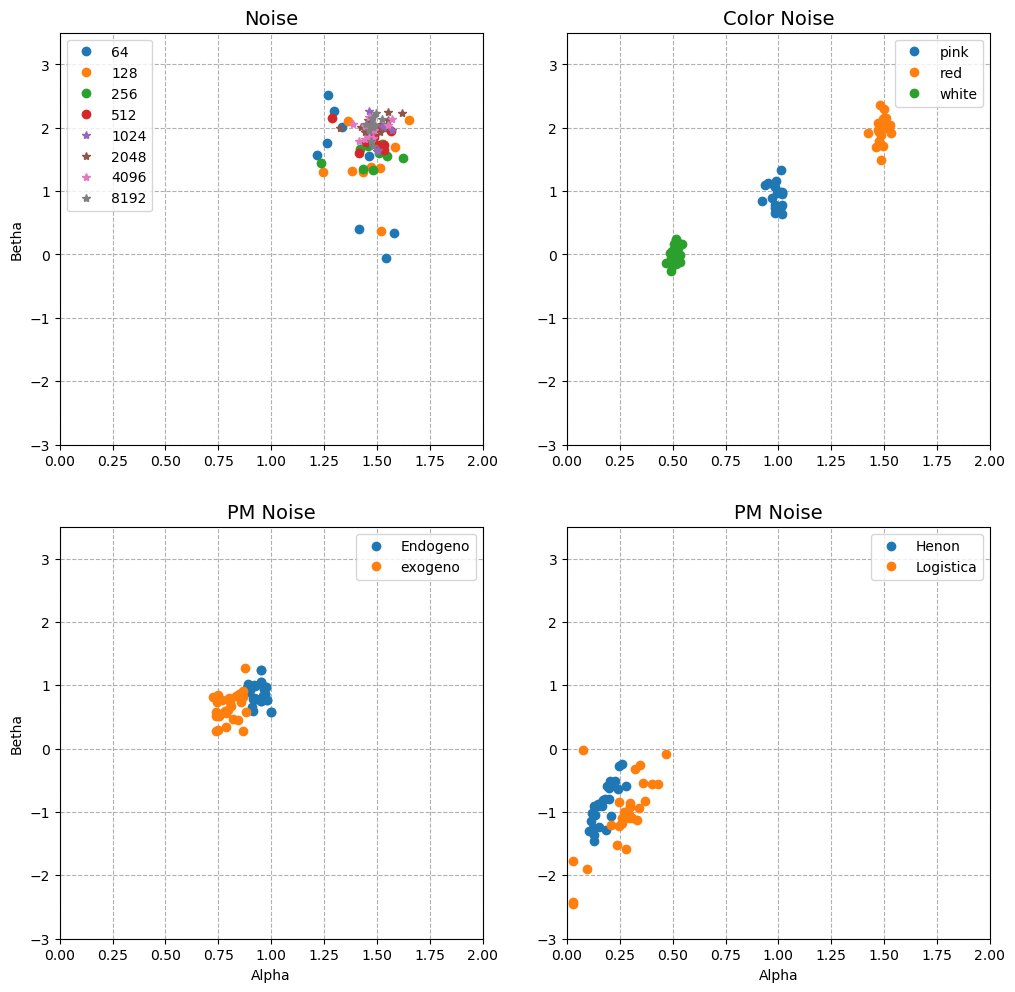

In [83]:
fig1 = plt.figure(figsize=(12,12),dpi=100)

plt.subplot(2,2,1)
plt.plot(frames_noise.Alpha[frames_noise.Group == '64'],
         frames_noise.Betha[frames_noise.Group == '64'],'o',label = '64')
plt.plot(frames_noise.Alpha[frames_noise.Group == '128'],
         frames_noise.Betha[frames_noise.Group == '128'],'o',label = '128')
plt.plot(frames_noise.Alpha[frames_noise.Group == '256'],
         frames_noise.Betha[frames_noise.Group == '256'],'o',label = '256')
plt.plot(frames_noise.Alpha[frames_noise.Group == '512'],
         frames_noise.Betha[frames_noise.Group == '512'],'o',label = '512')
plt.plot(frames_noise.Alpha[frames_noise.Group == '1024'],
         frames_noise.Betha[frames_noise.Group == '1024'],'*',label = '1024')
plt.plot(frames_noise.Alpha[frames_noise.Group == '2048'],
         frames_noise.Betha[frames_noise.Group == '2048'],'*',label = '2048')
plt.plot(frames_noise.Alpha[frames_noise.Group == '4096'],
         frames_noise.Betha[frames_noise.Group == '4096'],'*',label = '4096')
plt.plot(frames_noise.Alpha[frames_noise.Group == '8192'],
         frames_noise.Betha[frames_noise.Group == '8192'],'*',label = '8192')
plt.title('Noise',fontsize=14)
plt.ylabel('Betha')
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,2)
plt.plot(frames_color.Alpha[frames_color.Group == 'pink'],
           frames_color.Betha[frames_color.Group == 'pink'],'o',label = 'pink')
plt.plot(frames_color.Alpha[frames_color.Group == 'red'],
           frames_color.Betha[frames_color.Group == 'red'],'o',label = 'red')
plt.plot(frames_color.Alpha[frames_color.Group == 'white'],
           frames_color.Betha[frames_color.Group == 'white'],'o',label = 'white')
plt.title('Color Noise',fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,3)
plt.plot(frames_pm.Alpha[frames_pm.Group == 'Endogeno'],
           frames_pm.Betha[frames_pm.Group == 'Endogeno'],'o',label = 'Endogeno')
plt.plot(frames_pm.Alpha[frames_pm.Group == 'exogeno'],
           frames_pm.Betha[frames_pm.Group == 'exogeno'],'o',label = 'exogeno')
plt.title('PM Noise',fontsize=14)
plt.ylabel('Betha')
plt.xlabel('Alpha')
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,4)
plt.plot(frames_chaos.Alpha[frames_chaos.Group == 'Henon'],
           frames_chaos.Betha[frames_chaos.Group == 'Henon'],'o',label = 'Henon')
plt.plot(frames_chaos.Alpha[frames_chaos.Group == 'Logistica'],
           frames_chaos.Betha[frames_chaos.Group == 'Logistica'],'o',label = 'Logistica')
plt.title('Chaos Noise',fontsize=14)
plt.xlabel('Alpha')
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend()

In [66]:
frames_noise = frames_noise.drop([Group'],axis=1)
frames_noise['Group'] = 'Noise'
                                  
frames_color = frames_color.drop(['Group'],axis=1)
frames_color['Group'] = 'Color Noise'
                                  
frames_pm = frames_pm.drop(['Group'],axis=1)
frames_pm['Group'] = 'Pm Noise'
                                  
frames_chaos = frames_chaos.drop(['Group'],axis=1)
frames_chaos['Group'] = 'Pm Chaos'

,Asim,Curt,Group,Alpha,Betha
0,-0.439954,-1.105453,Pm Chaos,0.237352,-1.513728
1,-0.367062,-1.203610,Pm Chaos,0.209170,-1.205737
2,-0.405131,-1.143267,Pm Chaos,0.270431,-0.999493
3,0.141561,-1.490646,Pm Chaos,0.092584,-1.898721
4,0.181488,-1.491037,Pm Chaos,0.030422,-2.426051


## Resultados

In [71]:
betha_Teorico_noise = 2*frames_noise.Alpha - 1
betha_Teorico_color = 2*frames_color.Alpha - 1
betha_Teorico_pn = 2*frames_pm.Alpha - 1
betha_Teorico_chaos = 2*frames_chaos.Alpha - 1

## Alpha x Betha

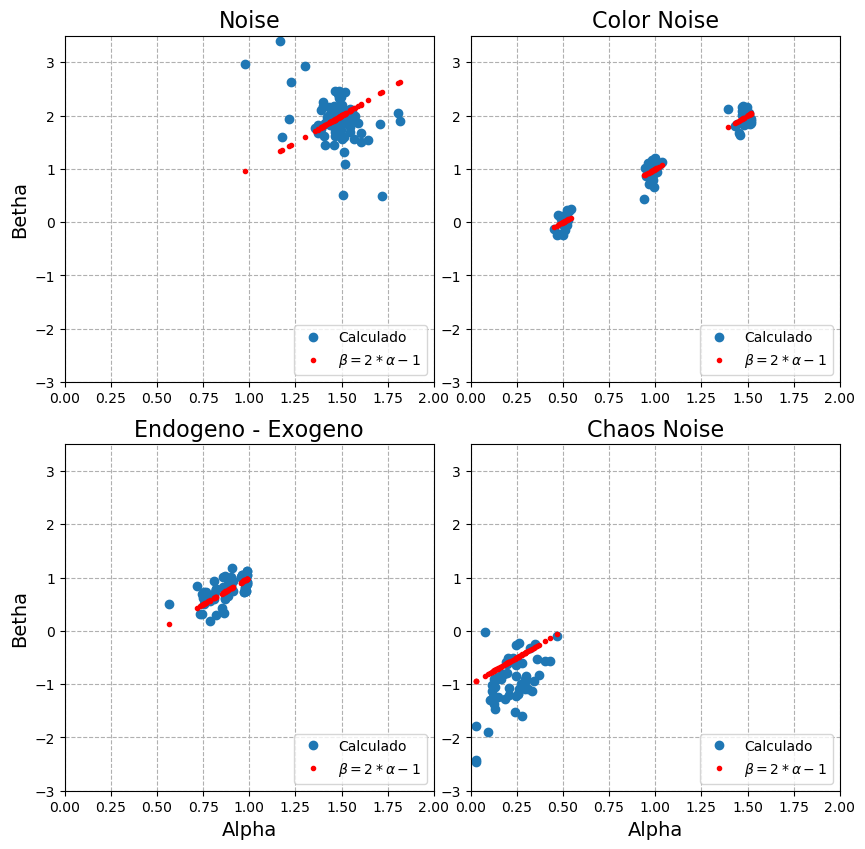

In [83]:
fig1 = plt.figure(figsize=(10,10),dpi=100)

x_r = np.arange(0,2.5,0.25)
x_r = np.arange(-1.5,3,0.25)
y_r = np.arange(-4,5,1)

labels = ['0','0.25','0.5','0.75','1','1.25','1.5','1.75','2']

ax1 = plt.subplot(2,2,1)
plt.plot(frames_noise.Alpha,betha_alpha_noise[:,0],'o',label = 'Calculado')
plt.plot(frames_noise.Alpha,betha_Teorico_noise,'.r',label = r'$\beta = 2*\alpha -1$')
plt.title('Noise',fontsize=16)
plt.ylabel('Betha',fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend(loc=4)

ax2 = plt.subplot(2,2,2)
plt.plot(frames_color.Alpha,betha_alpha_color[:,0],'o',label = 'Calculado')
plt.plot(frames_color.Alpha,betha_Teorico_color,'.r',label = r'$\beta = 2*\alpha -1$')
plt.title('Color Noise',fontsize=16)
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend(loc=4)

ax3 = plt.subplot(2,2,3)
plt.plot(frames_pm.Alpha,betha_alpha_pm[:,0],'o',label = 'Calculado')
plt.plot(frames_pm.Alpha,betha_Teorico_pn,'.r',label = r'$\beta = 2*\alpha -1$')
plt.title('Endogeno - Exogeno',fontsize=16)
plt.ylabel('Betha',fontsize=14)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend(loc=4)

ax4 = plt.subplot(2,2,4)
plt.plot(frames_chaos.Alpha,betha_alpha_chaos[:,0],'o',label = 'Calculado')
plt.plot(frames_chaos.Alpha,betha_Teorico_chaos,'.r',label = r'$\beta = 2*\alpha -1$')
plt.title('Chaos Noise',fontsize=16)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.legend(loc=4)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.18)

plt.show()

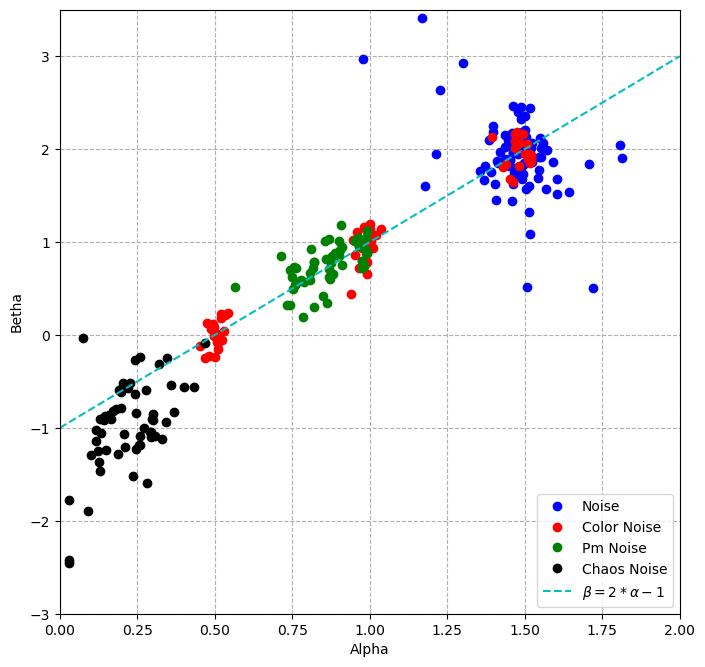

In [124]:
fig1 = plt.figure(figsize=(8,8),dpi=100)
xx = np.arange(0,2.1,0.1)
yy = 2*xx - 1
plt.plot(frames_noise.Alpha,betha_alpha_noise[:,0],'bo',label = 'Noise')
plt.plot(frames_color.Alpha,betha_alpha_color[:,0],'ro',label = 'Color Noise')
plt.plot(frames_pm.Alpha,betha_alpha_pm[:,0],'go',label = 'Pm Noise')
plt.plot(frames_chaos.Alpha,betha_alpha_chaos[:,0],'ko',label = 'Chaos Noise')
plt.plot(xx,yy,'c--',label=r'$\beta = 2*\alpha -1$')
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.ylabel('Betha')
plt.xlabel('Alpha')
plt.legend(loc=4)

## Alpha x Asimetria

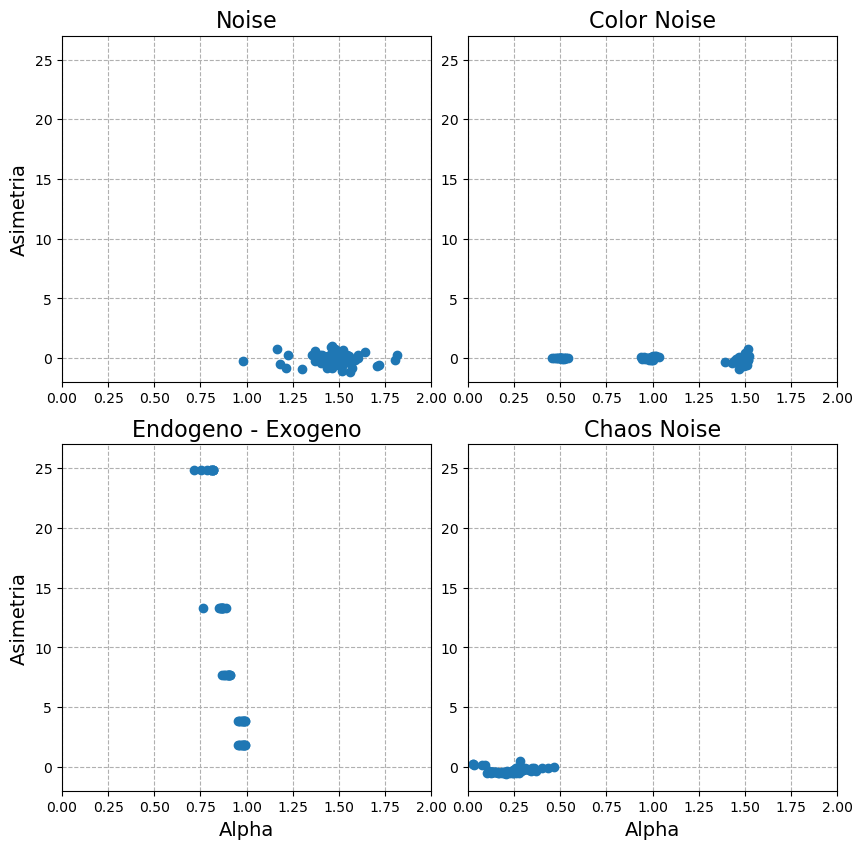

In [103]:
fig1 = plt.figure(figsize=(10,10),dpi=100)

x_r = np.arange(0,2.5,0.25)
x_r = np.arange(-1.5,3,0.25)
y_r = np.arange(-4,5,1)

labels = ['0','0.25','0.5','0.75','1','1.25','1.5','1.75','2']

ax1 = plt.subplot(2,2,1)
plt.plot(frames_noise.Alpha,frames_noise.Asim,'o',label = 'Calculado')
plt.title('Noise',fontsize=16)
plt.ylabel('Asimetria',fontsize=14)
plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax2 = plt.subplot(2,2,2)
plt.plot(frames_color.Alpha,frames_color.Asim,'o',label = 'Calculado')
plt.title('Color Noise',fontsize=16)
plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax3 = plt.subplot(2,2,3)
plt.plot(frames_pm.Alpha,frames_pm.Asim,'o',label = 'Calculado')
plt.title('Endogeno - Exogeno',fontsize=16)
plt.ylabel('Asimetria',fontsize=14)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax4 = plt.subplot(2,2,4)
plt.plot(frames_chaos.Alpha,frames_chaos.Asim,'o',label = 'Calculado')
plt.title('Chaos Noise',fontsize=16)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.18)

plt.show()

## Alpha x Kurtosis

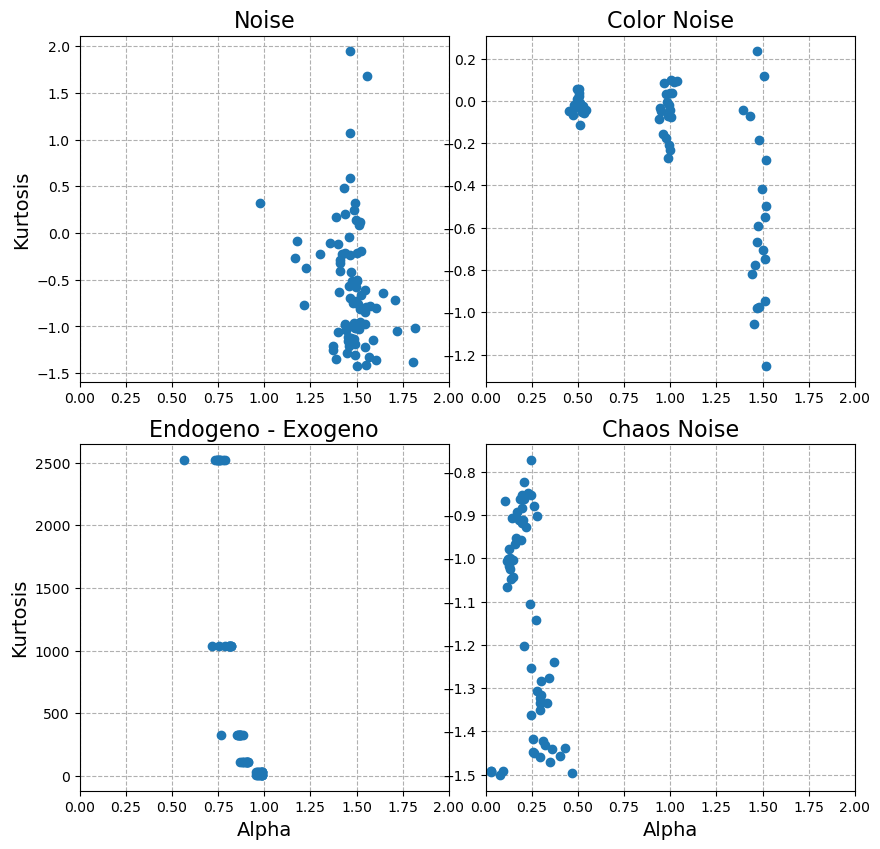

In [110]:
fig1 = plt.figure(figsize=(10,10),dpi=100)

x_r = np.arange(0,2.5,0.25)
x_r = np.arange(-1.5,3,0.25)
y_r = np.arange(-4,5,1)

labels = ['0','0.25','0.5','0.75','1','1.25','1.5','1.75','2']

ax1 = plt.subplot(2,2,1)
plt.plot(frames_noise.Alpha,frames_noise.Curt,'o',label = 'Calculado')
plt.title('Noise',fontsize=16)
plt.ylabel('Kurtosis',fontsize=14)
plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax2 = plt.subplot(2,2,2)
plt.plot(frames_color.Alpha,frames_color.Curt,'o',label = 'Calculado')
plt.title('Color Noise',fontsize=16)
plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax3 = plt.subplot(2,2,3)
plt.plot(frames_pm.Alpha,frames_pm.Curt,'o',label = 'Calculado')
plt.title('Endogeno - Exogeno',fontsize=16)
plt.ylabel('Kurtosis',fontsize=14)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')

ax4 = plt.subplot(2,2,4)
plt.plot(frames_chaos.Alpha,frames_chaos.Curt,'o',label = 'Calculado')
plt.title('Chaos Noise',fontsize=16)
plt.xlabel('Alpha',fontsize=14)
plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.18)

plt.show()

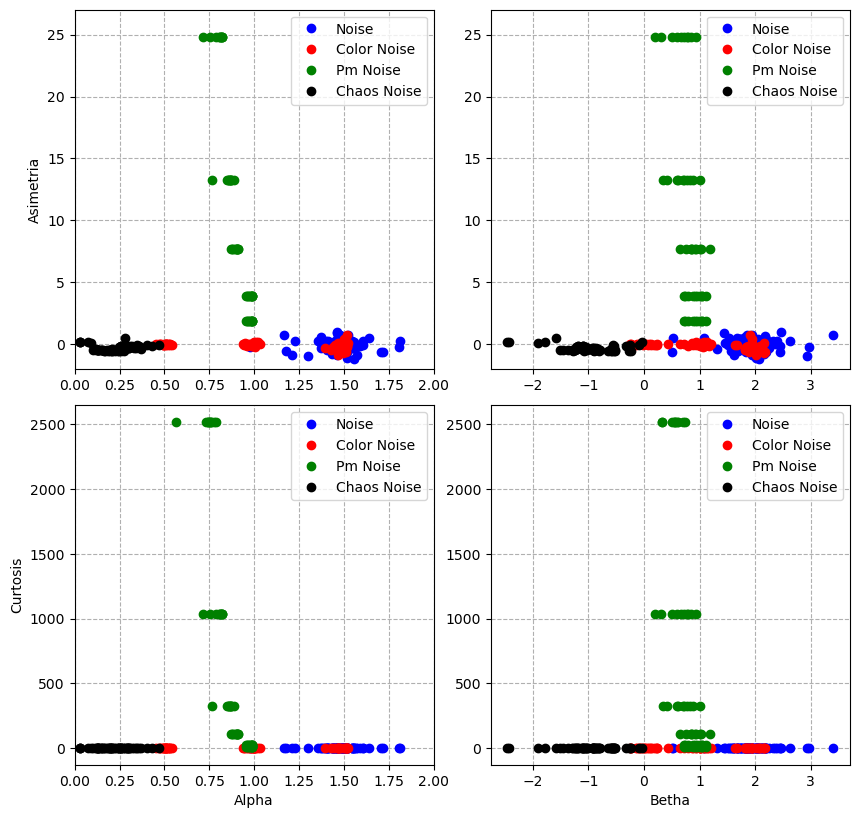

In [129]:
fig1 = plt.figure(figsize=(10,10),dpi=100)

plt.subplot(2,2,1)
plt.plot(frames_noise.Alpha,frames_noise.Asim,'bo',label = 'Noise')
plt.plot(frames_color.Alpha,frames_color.Asim,'ro',label = 'Color Noise')
plt.plot(frames_pm.Alpha,frames_pm.Asim,'go',label = 'Pm Noise')
plt.plot(frames_chaos.Alpha,frames_chaos.Asim,'ko',label = 'Chaos Noise')
plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')
plt.ylabel('Asimetria')
plt.legend()

plt.subplot(2,2,2)
plt.plot(frames_noise.Betha,frames_noise.Asim,'bo',label = 'Noise')
plt.plot(frames_color.Betha,frames_color.Asim,'ro',label = 'Color Noise')
plt.plot(frames_pm.Betha,frames_pm.Asim,'go',label = 'Pm Noise')
plt.plot(frames_chaos.Betha,frames_chaos.Asim,'ko',label = 'Chaos Noise')
#plt.xlim(0,2)
plt.ylim(-2,27)
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,3)
plt.plot(frames_noise.Alpha,frames_noise.Curt,'bo',label = 'Noise')
plt.plot(frames_color.Alpha,frames_color.Curt,'ro',label = 'Color Noise')
plt.plot(frames_pm.Alpha,frames_pm.Curt,'go',label = 'Pm Noise')
plt.plot(frames_chaos.Alpha,frames_chaos.Curt,'ko',label = 'Chaos Noise')
plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')
plt.ylabel('Curtosis')
plt.xlabel('Alpha')
plt.legend()

plt.subplot(2,2,4)
plt.plot(frames_noise.Betha,frames_noise.Curt,'bo',label = 'Noise')
plt.plot(frames_color.Betha,frames_color.Curt,'ro',label = 'Color Noise')
plt.plot(frames_pm.Betha,frames_pm.Curt,'go',label = 'Pm Noise')
plt.plot(frames_chaos.Betha,frames_chaos.Curt,'ko',label = 'Chaos Noise')
#plt.xlim(0,2)
#plt.ylim(-2,27)
plt.grid('on',linestyle='--')
plt.xlabel('Betha')
plt.legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.16, hspace=0.1)

## (a) ST-Sol3GHz

In [131]:
with open("../data/sol3ghz2.dat.txt", "r") as fh:
    data0 = (fh.read().split('\n'))
Temp_Sol = np.zeros(6000)
for i in range(len(data0)):
    Temp_Sol[i] = float(data0[i])*100

## (b) ST-surftemp504

In [132]:
with open("../data/surftemp504.txt", "r") as fh:
    data1 = (fh.read().split('\n'))

## Covid19 Brazil

In [133]:
Temp_Sup = np.zeros(504)
for i in range(len(Temp_Sup)):
    Temp_Sup[i] = float(data1[i])

In [134]:
data2 = pd.read_csv("../data/owid-covid-data.csv") 
data2.drop(['iso_code','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
            'hospital_beds_per_100k','handwashing_facilities','male_smokers','female_smokers',
            'cvd_death_rate','extreme_poverty','gdp_per_capita','aged_70_older','aged_65_older',
            'median_age','population_density','population','stringency_index','tests_units',
            'total_tests_per_thousand','new_tests_smoothed_per_thousand','new_tests_smoothed',
            'new_tests_per_thousand','new_tests','total_tests','new_deaths_per_million',
            'diabetes_prevalence'],axis=1)

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Aruba,2020-03-13,2,2,0,0
1,Aruba,2020-03-20,4,2,0,0
2,Aruba,2020-03-24,12,8,0,0
3,Aruba,2020-03-25,17,5,0,0
4,Aruba,2020-03-26,19,2,0,0
...,...,...,...,...,...,...
21601,International,2020-02-28,705,0,4,0
21602,International,2020-02-29,705,0,6,2
21603,International,2020-03-01,705,0,6,0
21604,International,2020-03-02,705,0,6,0


In [135]:
covid19_brazil = data2[data2.location == 'Brazil']
covid19_brazil = covid19_brazil.reset_index(drop=True)
covid19_casos = covid19_brazil.new_cases

In [136]:
Temp_Sol_norm,Temp_Sol_esta = Normalizar2(Temp_Sol)
Temp_Sup_norm,Temp_Sup_esta = Normalizar2(Temp_Sup)

covid19_casos_norm = covid19_casos/max(covid19_casos)
covid19_casos_esta = Estadisticos2(covid19_casos)

Text(0.5, 1.0, 'NDC Covid19 Brazil')

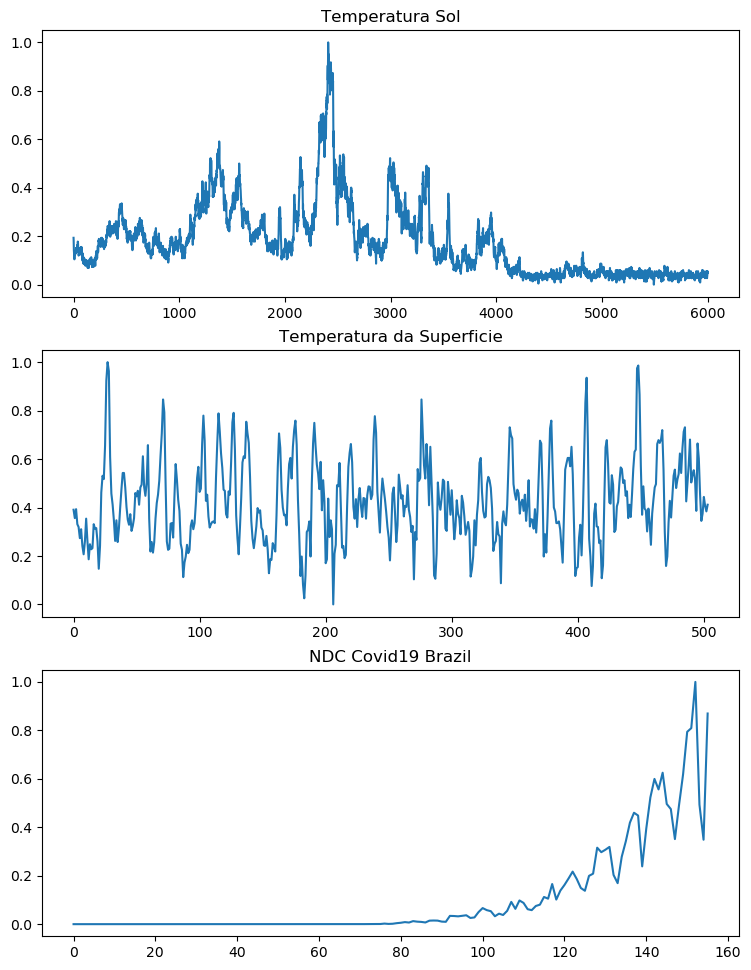

In [138]:
fig1 = plt.figure(figsize=(9,12),dpi=100)

plt.subplot(3,1,1)
plt.plot(Temp_Sol_norm)
plt.title('Temperatura Sol')

plt.subplot(3,1,2)
plt.plot(Temp_Sup_norm)
plt.title('Temperatura da Superficie')

plt.subplot(3,1,3)
plt.plot(covid19_casos_norm)
plt.title('NDC Covid19 Brazil')

# Betha e Alpha

## Temperatura do Sol

In [139]:
freqs, power, xdata, ydata, amp, betha_Sol, powerlaw, INICIO, FIM = psd(Temp_Sol_norm)
alpha_Sol, vetoutput, x, y, reta, erro = dfa1d(Temp_Sol_norm,1)

## Temperatura da Superficie

In [140]:
freqs, power, xdata, ydata, amp, betha_Sup, powerlaw, INICIO, FIM = psd(Temp_Sup_norm)
alpha_Sup, vetoutput, x, y, reta, erro = dfa1d(Temp_Sup_norm,1)

## Covid19 Brazil

In [141]:
freqs, power, xdata, ydata, amp, betha_Cov, powerlaw, INICIO, FIM = psd(covid19_casos_norm)
alpha_Cov, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_norm,1)

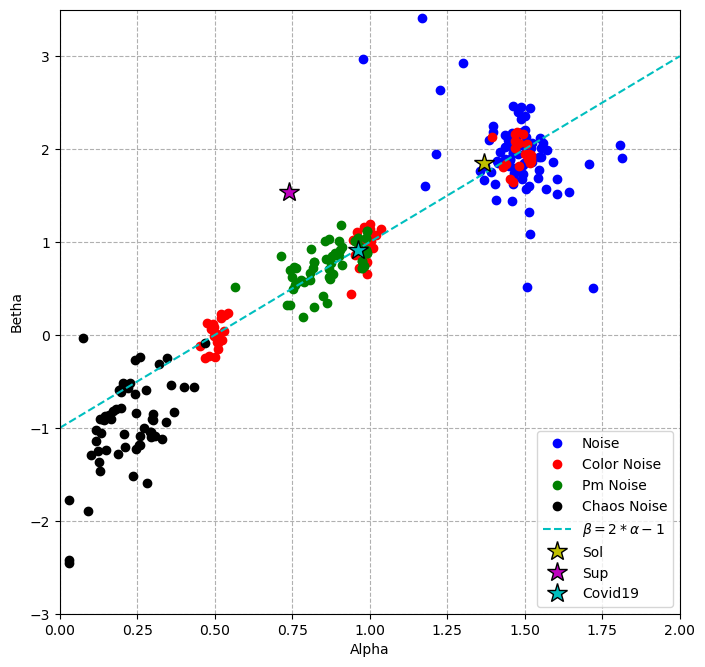

In [158]:
fig1 = plt.figure(figsize=(8,8),dpi=100)
xx = np.arange(0,2.1,0.1)
yy = 2*xx - 1
plt.plot(frames_noise.Alpha,betha_alpha_noise[:,0],'bo',label = 'Noise')
plt.plot(frames_color.Alpha,betha_alpha_color[:,0],'ro',label = 'Color Noise')
plt.plot(frames_pm.Alpha,betha_alpha_pm[:,0],'go',label = 'Pm Noise')
plt.plot(frames_chaos.Alpha,betha_alpha_chaos[:,0],'ko',label = 'Chaos Noise')
plt.plot(xx,yy,'c--',label=r'$\beta = 2*\alpha -1$')

plt.plot(alpha_Sol,betha_Sol,'y*',markersize=15,markeredgecolor='k',label='Sol')
plt.plot(alpha_Sup,betha_Sup,'m*',markersize=15,markeredgecolor='k',label='Sup')
plt.plot(alpha_Cov,betha_Cov,'c*',markersize=15,markeredgecolor='k',label='Covid19')

plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')
plt.ylabel('Betha')
plt.xlabel('Alpha')
plt.legend(loc=4)

## Agrupamento

## Temperatura Sol
#### Para a temperatura do sol está fora do grupo característico da rede Color Noise vermelho mas perto da nuvem de pontos de noise, particularmente para séries temporais com baixo número de elementos (64, 128, 256).

## Temperatura da Superficie
#### Esta série temporal não está dentro de nenhuma das séries utilizadas anteriormente, mas considerando a série mais próxima, seria o grupo endógeno.

## Covid19 Brazil
####  Usando a figura como referência a estrela representando a série temporal da covid19-Brasil está no grupo Color Noise pink e também no grupo do Pm Noise Endogeno.